In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import zipfile

# with zipfile.ZipFile('/kaggle/input/leaf-classification/sample_submission.csv.zip') as z_samp:
#     z_samp.extractall()

# with zipfile.ZipFile('/kaggle/input/leaf-classification/train.csv.zip') as z:
#     z.extractall()
# with zipfile.ZipFile('/kaggle/input/leaf-classification/images.zip') as z_img:
#     z_img.extractall()
    
# with zipfile.ZipFile('/kaggle/input/leaf-classification/test.csv.zip') as z_test:
#     z_test.extractall()
    
# os.listdir()

In [3]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,30))
# import cv2 as cv
# from keras.preprocessing.image import load_img
# for i in range(25):
#     j=np.random.choice((os.listdir('images')))
#     plt.subplot(5,5,i+1)
#     img=load_img(os.path.join('/kaggle/working/images',j))
#     plt.imshow(img)

#Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #Set aesthetic parameters in one step.

# to split the data set
from sklearn.model_selection import train_test_split
# LabelEncoder module
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit


from tensorflow import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
from tensorflow.keras.optimizers import  SGD, Adam, Adagrad, Adadelta, Adamax
import datetime
from keras.regularizers import l2

#  **Loading The CSV Data**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/MyDrive/DEBI/Queens/DL/train.csv")
df

id                species   margin1   margin2   margin3   margin4  \
0       1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1       2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2       3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3       5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4       6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   
..    ...                    ...       ...       ...       ...       ...   
985  1575   Magnolia_Salicifolia  0.060547  0.119140  0.007812  0.003906   
986  1578            Acer_Pictum  0.001953  0.003906  0.021484  0.107420   
987  1581     Alnus_Maximowiczii  0.001953  0.003906  0.000000  0.021484   
988  1582          Quercus_Rubra  0.000000  0.000000  0.046875  0.056641   
989  1584         Quercus_Afares  0.023438  0.019531  0.031250  0.015625   

      margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0    0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1    0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2    0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3    0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4    0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   
..        ...       ...       ...      ...  ...        ...        ...   
985  0.000000  0.148440  0.017578      0.0  ...   0.242190   0.000000   
986  0.001953  0.000000  0.000000      0.0  ...   0.170900   0.000000   
987  0.078125  0.003906  0.007812      0.0  ...   0.004883   0.000977   
988  0.009766  0.000000  0.000000      0.0  ...   0.083008   0.030273   
989  0.005859  0.019531  0.035156      0.0  ...   0.000000   0.000000   

     texture57  texture58  texture59  texture60  texture61  texture62  \
0     0.002930   0.002930   0.035156   0.000000   0.000000   0.004883   
1     0.000000   0.000977   0.023438   0.000000   0.000000   0.000977   
2     0.005859   0.000977   0.007812   0.000000   0.000000   0.000000   
3     0.000000   0.000000   0.020508   0.000000   0.000000   0.017578   
4     0.021484   0.000000   0.000000   0.000000   0.000000   0.000000   
..         ...        ...        ...        ...        ...        ...   
985   0.034180   0.000000   0.010742   0.000000   0.000000   0.000000   
986   0.018555   0.000000   0.011719   0.000000   0.000000   0.000977   
987   0.004883   0.027344   0.016602   0.007812   0.000000   0.027344   
988   0.000977   0.002930   0.014648   0.000000   0.041992   0.000000   
989   0.002930   0.000000   0.012695   0.000000   0.000000   0.023438   

     texture63  texture64  
0     0.000000   0.025391  
1     0.039062   0.022461  
2     0.020508   0.002930  
3     0.000000   0.047852  
4     0.000000   0.031250  
..         ...        ...  
985   0.000000   0.018555  
986   0.000000   0.021484  
987   0.000000   0.001953  
988   0.001953   0.002930  
989   0.025391   0.022461  

[990 rows x 194 columns]

### **Display the type for each Column**

In [7]:
df.info(verbose=True,max_cols=34,memory_usage=True,show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 194 columns):
 #    Column     Non-Null Count  Dtype  
---   ------     --------------  -----  
 0    id         990 non-null    int64  
 1    species    990 non-null    object 
 2    margin1    990 non-null    float64
 3    margin2    990 non-null    float64
 4    margin3    990 non-null    float64
 5    margin4    990 non-null    float64
 6    margin5    990 non-null    float64
 7    margin6    990 non-null    float64
 8    margin7    990 non-null    float64
 9    margin8    990 non-null    float64
 10   margin9    990 non-null    float64
 11   margin10   990 non-null    float64
 12   margin11   990 non-null    float64
 13   margin12   990 non-null    float64
 14   margin13   990 non-null    float64
 15   margin14   990 non-null    float64
 16   margin15   990 non-null    float64
 17   margin16   990 non-null    float64
 18   margin17   990 non-null    float64
 19   margin18   990 non-null    

## **The Description of the Data**

In [8]:
df.describe()

id     margin1     margin2     margin3     margin4  \
count   990.000000  990.000000  990.000000  990.000000  990.000000   
mean    799.595960    0.017412    0.028539    0.031988    0.023280   
std     452.477568    0.019739    0.038855    0.025847    0.028411   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     415.250000    0.001953    0.001953    0.013672    0.005859   
50%     802.500000    0.009766    0.011719    0.025391    0.013672   
75%    1195.500000    0.025391    0.041016    0.044922    0.029297   
max    1584.000000    0.087891    0.205080    0.156250    0.169920   

          margin5     margin6     margin7     margin8     margin9  ...  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  ...   
mean     0.014264    0.038579    0.019202    0.001083    0.007167  ...   
std      0.018390    0.052030    0.017511    0.002743    0.008933  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.001953    0.000000    0.005859    0.000000    0.001953  ...   
50%      0.007812    0.015625    0.015625    0.000000    0.005859  ...   
75%      0.017578    0.056153    0.029297    0.000000    0.007812  ...   
max      0.111330    0.310550    0.091797    0.031250    0.076172  ...   

        texture55   texture56   texture57   texture58   texture59   texture60  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.036501    0.005024    0.015944    0.011586    0.016108    0.014017   
std      0.063403    0.019321    0.023214    0.025040    0.015335    0.060151   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000977    0.000000    0.004883    0.000000   
50%      0.004883    0.000000    0.005859    0.000977    0.012695    0.000000   
75%      0.043701    0.000000    0.022217    0.009766    0.021484    0.000000   
max      0.429690    0.202150    0.172850    0.200200    0.106450    0.578130   

        texture61   texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  990.000000  
mean     0.002688    0.020291    0.008989    0.019420  
std      0.011415    0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000977  
50%      0.000000    0.003906    0.002930    0.011719  
75%      0.000000    0.023438    0.012695    0.029297  
max      0.151370    0.375980    0.086914    0.141600  

[8 rows x 193 columns]

### **The data does not need to normalize because the data description show the range for each column and as we can see that every column has range from zero to 1.**

### **To check if there is an null values**

In [9]:
print(df.isnull().sum().sort_values(ascending=False))
print('=========================================')
print(df.isnull().sum().any())
#there is no null values

id           0
texture16    0
shape58      0
shape59      0
shape60      0
            ..
shape2       0
shape3       0
shape4       0
shape5       0
texture64    0
Length: 194, dtype: int64
False


### **To check if there is any duplication**

In [10]:
df.duplicated().sum()

0

#Data Virtualization

### **The relationship between multiple variables and attributes in the Dataset.**

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap="Spectral")

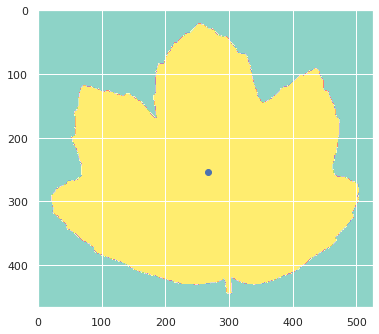

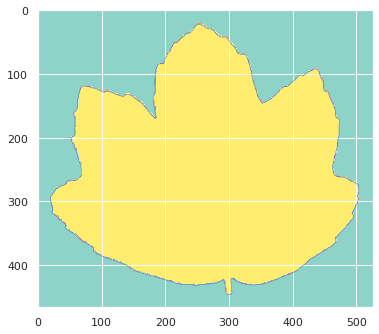

In [12]:
# imports
import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.patches as mpatches  # to draw a circle at the mean contour
from skimage import measure            # to find shape contour
import scipy.ndimage as ndi            # to determine shape centrality


# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots


# reading an image file using matplotlib into a numpy array
# good ones: 11, 19, 23, 27, 48, 53, 78, 218

img = mpimg.imread('1.jpg')

# using image processing module of scipy to find the center of the leaf
cy, cx = ndi.center_of_mass(img)

plt.imshow(img, cmap='Set3')  # show me the leaf
plt.scatter(cx, cy)           # show me its center
plt.show()

# scikit-learn imaging contour finding, returns a list of found edges
contours = measure.find_contours(img, .8)

# from which we choose the longest one
contour = max(contours, key=len)

# let us see the contour that we hopefully found
plt.plot(contour[::,1], contour[::,0], linewidth=0.5)  # (I will explain this [::,x] later)
plt.imshow(img, cmap='Set3')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


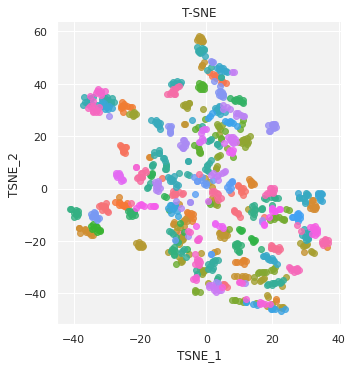

In [13]:
import matplotlib
import pandas as pd 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".95"})

data = pd.read_csv('/content/drive/MyDrive/DEBI/Queens/DL/train.csv')

species = data['species']
data = data.drop(['species','id'],axis = 1)

tsne = TSNE()
X_tsne = tsne.fit_transform(np.array(data))

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(X_tsne)
proj.columns = ["TSNE_1", "TSNE_2"]
proj["labels"] = species
sns.lmplot("TSNE_1", "TSNE_2", hue = "labels", data = proj ,fit_reg=False, legend=False)
# remove legend due to output rendering (try locally to see the results)


plt.xlabel('TSNE_1')
plt.ylabel('TSNE_2')
plt.title('T-SNE')
plt.savefig('1.png')
plt.show() 

### **Using Label Encoder to encode target labels**

In [14]:
encoder = LabelEncoder().fit(df.species)
Y = encoder.transform(df.species)
Y[:10]

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89])

In [15]:
X = df.iloc[:, :]
X.drop(['species', 'id'], axis = 1, inplace = True)
X.head()

margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0  0.007812  0.023438  0.023438  0.003906  0.011719  0.009766  0.027344   
1  0.005859  0.000000  0.031250  0.015625  0.025391  0.001953  0.019531   
2  0.005859  0.009766  0.019531  0.007812  0.003906  0.005859  0.068359   
3  0.000000  0.003906  0.023438  0.005859  0.021484  0.019531  0.023438   
4  0.005859  0.003906  0.048828  0.009766  0.013672  0.015625  0.005859   

   margin8   margin9  margin10  ...  texture55  texture56  texture57  \
0      0.0  0.001953  0.033203  ...   0.007812   0.000000   0.002930   
1      0.0  0.000000  0.007812  ...   0.000977   0.000000   0.000000   
2      0.0  0.000000  0.044922  ...   0.154300   0.000000   0.005859   
3      0.0  0.013672  0.017578  ...   0.000000   0.000977   0.000000   
4      0.0  0.000000  0.005859  ...   0.096680   0.000000   0.021484   

   texture58  texture59  texture60  texture61  texture62  texture63  texture64  
0   0.002930   0.035156        0.0        0.0   0.004883   0.000000   0.025391  
1   0.000977   0.023438        0.0        0.0   0.000977   0.039062   0.022461  
2   0.000977   0.007812        0.0        0.0   0.000000   0.020508   0.002930  
3   0.000000   0.020508        0.0        0.0   0.017578   0.000000   0.047852  
4   0.000000   0.000000        0.0        0.0   0.000000   0.000000   0.031250  

[5 rows x 192 columns]

In [16]:
print(df.shape)
print(X.shape)
print(Y.shape)

(990, 192)
(990, 192)
(990,)


### **Divide the data into a training and test set using approximately 80% for training and validation dataset**

In [17]:
xTrain, xTest, yTr, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(xTrain.shape)
print(xTest.shape)
print(yTr.shape)
print(yTest.shape)

(792, 192)
(198, 192)
(792,)
(198,)


In [18]:
xTrain, X_val, yTrain, y_val = train_test_split(xTrain, yTr, test_size=0.15, random_state=42)

print(xTrain.shape)
print(xTest.shape)
print(X_val.shape)
print(y_val.shape)

(673, 192)
(198, 192)
(119, 192)
(119,)


#### **Dictionary with the given sequence of elements**

In [19]:
output_shape = list(dict.fromkeys(Y))
len(output_shape)

99

In [20]:
input_features = X.shape[1]
input_features

192

### **We will build our deep learning model into a function to make it easier to use it multiple times**

In [21]:
#build a base model as function to call this function with different hyperparameter 
#but we have default hyperparameter
def base_line_model(optim = Adam() , bat_size = 32,  hid_nodes = 512, drop_rate = 0.5):
  # define the keras model
  model = Sequential()
  # In layer_1 our activation function is 'tanh' with default 512 neurons and kernel_initializer 'glorot_uniform'
  model.add(Dense(hid_nodes, activation='tanh', input_shape=(input_features,), kernel_initializer = 'glorot_uniform', bias_initializer='zeros', name = 'Layer_1'))
  #dropout some nerouns to avoid overfitting
  model.add(Dropout(drop_rate))
  #output layer with softmax activation function and has 99 nodes for output shape
  model.add(Dense(99 , activation='softmax', name = 'Output'))
  #compile the model with sparse_categorical_crossentropy loss function and accuracy metrics
  model.compile(optimizer = optim ,loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

  #fit the model with 100 epoch
  history = model.fit(xTrain , yTrain , epochs=100 , batch_size=bat_size , validation_data=(X_val, y_val))

  #return the training model and the history
  return model, history

#trial_1

## **We had used adam optimizer in our first model with 32 batch size and 0.5 drop out ratio** 

In [22]:
#the source of why we use this hyperparameter for Adam
#https://keras.io/api/optimizers/
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
adam = Adam(learning_rate = lr_schedule)
#call the model function with adam optimizer 
model_1, history_1 = base_line_model(adam)
#display summary for the model
model_1.summary()
#evaluate the model
model_1.evaluate(xTest, yTest)

Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 4.5732 - accuracy: 0.0461 - val_loss: 4.5408 - val_accuracy: 0.1008
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 4.4871 - accuracy: 0.2377 - val_loss: 4.4728 - val_accuracy: 0.2521
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 4.3945 - accuracy: 0.3031 - val_loss: 4.3947 - val_accuracy: 0.2101
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 4.2701 - accuracy: 0.3789 - val_loss: 4.2858 - val_accuracy: 0.3193
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 4.1232 - accuracy: 0.4264 - val_loss: 4.1493 - val_accuracy: 0.2773
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 3.9456 - accuracy: 0.4056 - val_loss: 3.9834 - val_accuracy: 0.2857
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 3.7292 - accuracy: 0.4487 - val_loss: 3.7921 - val_accuracy: 0.3025
Epoch 8/100


[0.28151145577430725, 0.9444444179534912]

### **We will virtualize for accuracy and val_accuracy in a function to make it easier to virtualize all our models**

In [23]:
def virc_(model_name, history):
    model_history = pd.DataFrame(history.history)
    model_history['epoch'] = history.epoch
    fig, ax = plt.subplots(figsize=(14,8))
    num_epochs = model_history.shape[0]
    ax.plot(np.arange(0, num_epochs), model_history["accuracy"], label="Training accuracy", lw=3, color='#f4b400')
    ax.plot(np.arange(0, num_epochs), model_history["val_accuracy"], label="Validation accuracy", lw=3, color='#0f9d58')
    ax.legend()
    plt.tight_layout()
    plt.show()

### **We will virtualize for loss and val_loss in a function to make it easier to virtualize all our models**

In [24]:
def virc_loss(model_name, history):
    model_history = pd.DataFrame(history.history)
    model_history['epoch'] = history.epoch
    fig, ax = plt.subplots(figsize=(14,8))
    num_epochs = model_history.shape[0]
    ax.plot(np.arange(0, num_epochs), model_history["loss"], label="Training loss", lw=3, color='#f4b400')
    ax.plot(np.arange(0, num_epochs), model_history["val_loss"], label="Validation loss", lw=3, color='#0f9d58')
    ax.legend()
    plt.tight_layout()
    plt.show()

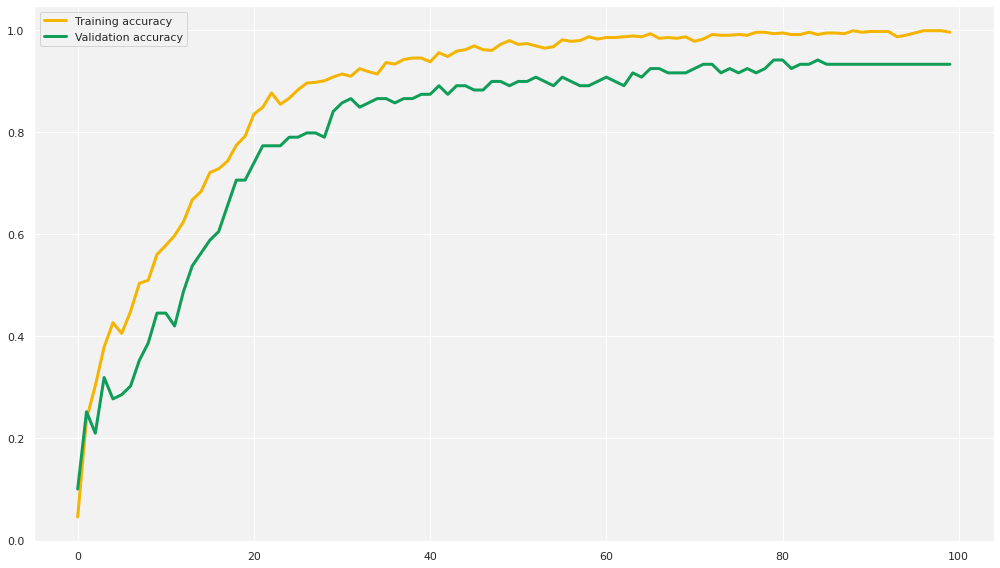

In [25]:
#virtualization for the training accuracy and validation accuracy throw the epochs number
virc_(model_1,history_1)

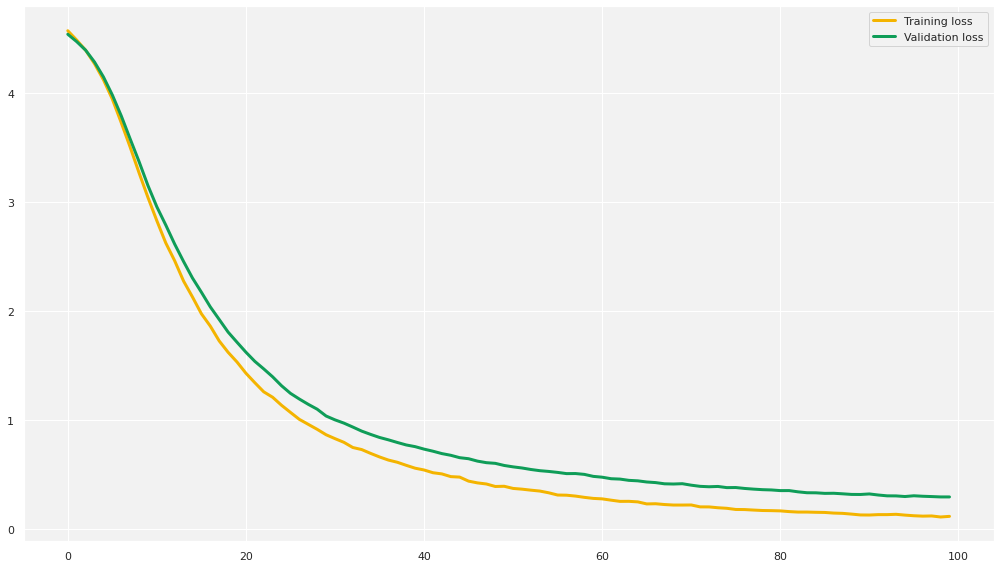

In [26]:
#virtualization for the training loss and validation loss throw the epochs number
virc_loss(model_1,history_1)

as we see from the history of validation and trining accuracy and loss we can use only 80 epoch instead of 100 epoch

#trial_2

### **Our second model with RMSProp optimizer with 32 batch size and 0.5 drop out ratio.**

In [27]:
#the source of why we use this hyperparameter for RMSprop 
#https://keras.io/api/optimizers/rmsprop/
rms_prop = tf.keras.optimizers.RMSprop(learning_rate=0.01,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False, name="RMSprop")
#call the model function with RMSprop optimizer 
model_2,history_2 = base_line_model(rms_prop)
#display summary for the model
model_2.summary()
#evaluate the model
model_2.evaluate(xTest, yTest)

Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 4.1894 - accuracy: 0.1263 - val_loss: 3.5492 - val_accuracy: 0.1933
Epoch 2/100
22/22 [==============================] - 0s 7ms/step - loss: 2.8773 - accuracy: 0.3492 - val_loss: 2.4135 - val_accuracy: 0.4874
Epoch 3/100
22/22 [==============================] - 0s 7ms/step - loss: 1.9459 - accuracy: 0.5542 - val_loss: 1.7981 - val_accuracy: 0.5546
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 1.3025 - accuracy: 0.7221 - val_loss: 1.3082 - val_accuracy: 0.6891
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 0.9621 - accuracy: 0.7875 - val_loss: 1.0204 - val_accuracy: 0.7143
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7056 - accuracy: 0.8648 - val_loss: 0.7093 - val_accuracy: 0.8739
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss: 0.5198 - accuracy: 0.8945 - val_loss: 0.6679 - val_accuracy: 0.8067
Epoch 8/100


[0.20205000042915344, 0.9595959782600403]

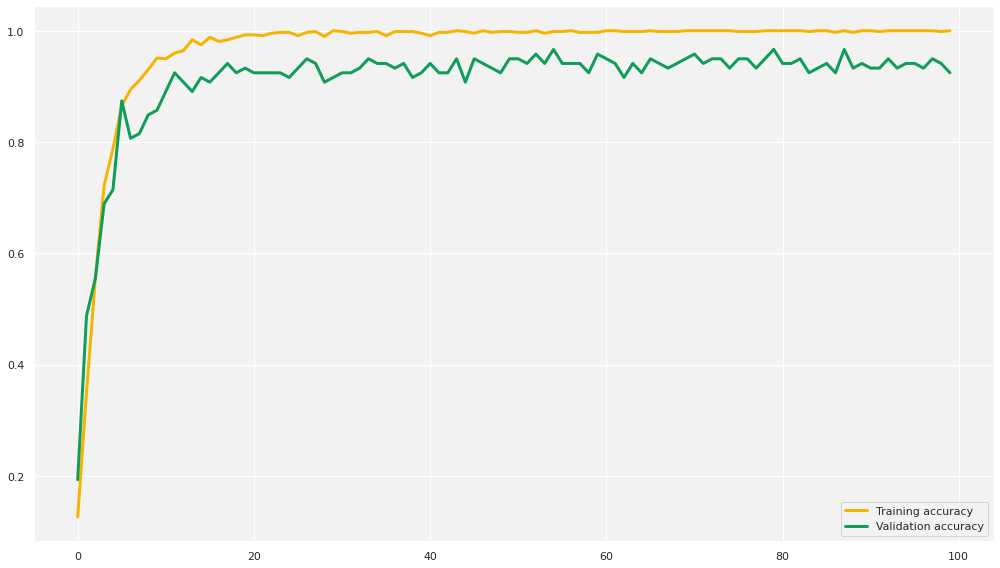

In [28]:
#virtualization for the training accuracy and validation accuracy throw the epochs number
virc_(model_2,history_2)

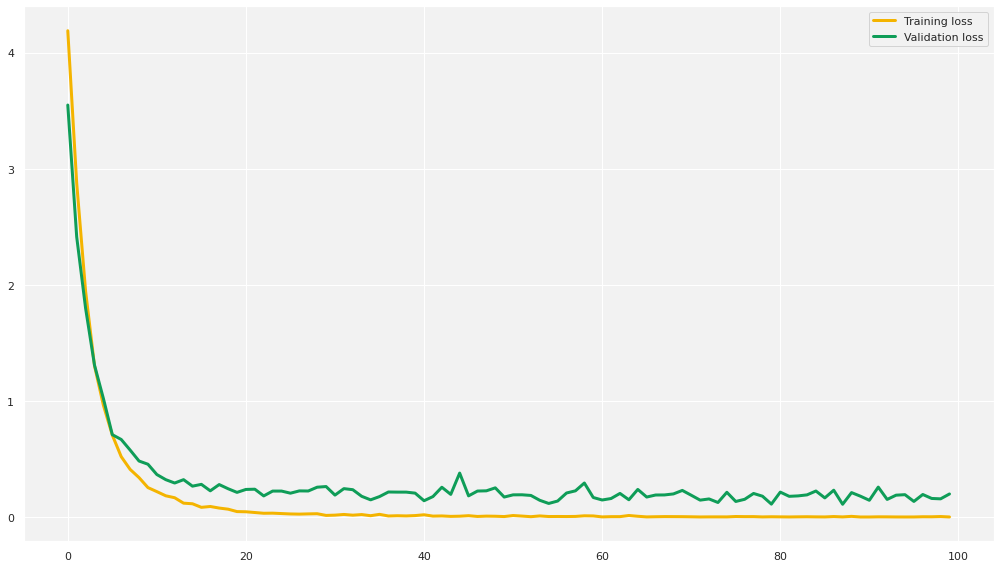

In [29]:
#virtualization for the training accuracy and validation accuracy throw the epochs number
virc_loss(model_2,history_2)

#trial_3

### **Our second model with SGD optimizer with 32 batch size and 0.5 drop out ratio.**

In [30]:
#the source of why we use this hyperparameter for RMSprop 
#https://keras.io/api/optimizers/sgd/
sgd = tf.keras.optimizers.SGD(learning_rate=0.9, momentum=0.0, nesterov=False, name="SGD")
# 
model_3,history_3 = base_line_model(sgd)

model_3.summary()
model_3.evaluate(xTest, yTest)

Epoch 1/100
22/22 [==============================] - 1s 13ms/step - loss: 4.6095 - accuracy: 0.0163 - val_loss: 4.7689 - val_accuracy: 0.0084
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 4.6053 - accuracy: 0.0149 - val_loss: 4.7983 - val_accuracy: 0.0252
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 4.5674 - accuracy: 0.0193 - val_loss: 4.9883 - val_accuracy: 0.0084
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 4.5268 - accuracy: 0.0461 - val_loss: 5.7019 - val_accuracy: 0.0000e+00
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 4.4841 - accuracy: 0.0520 - val_loss: 5.6721 - val_accuracy: 0.0084
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 4.4165 - accuracy: 0.0817 - val_loss: 5.2226 - val_accuracy: 0.0084
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 4.3130 - accuracy: 0.1070 - val_loss: 5.3008 - val_accuracy: 0.0000e+00
Epoc

[0.9851886630058289, 0.7272727489471436]

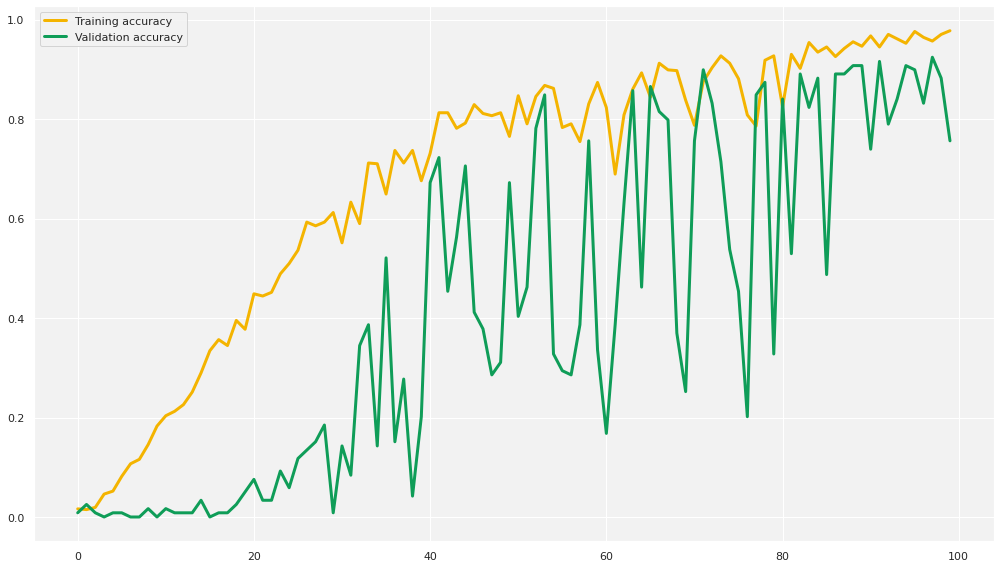

In [31]:
#virtualization for the training accuracy and validation accuracy throw the epochs number
virc_(model_3,history_3)

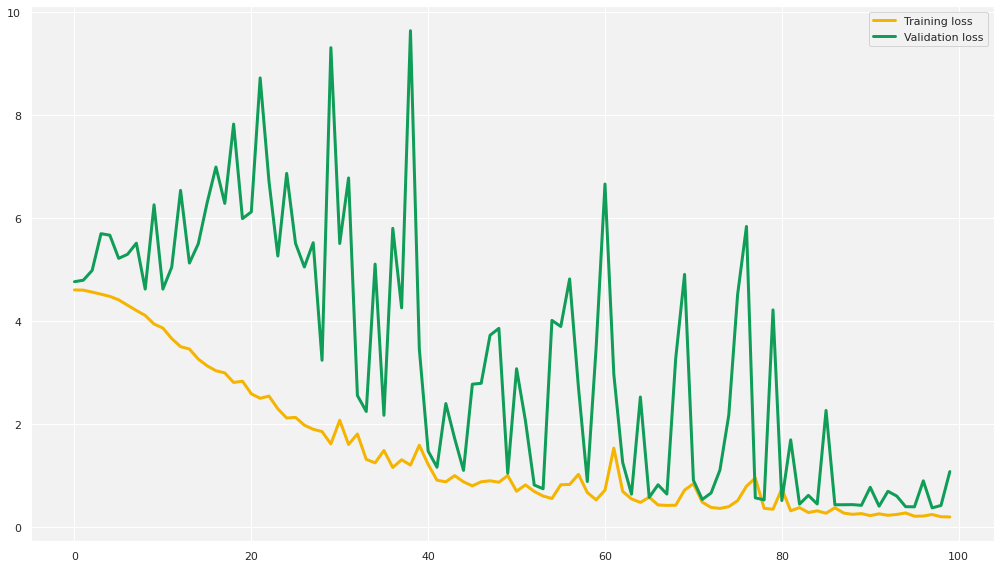

In [32]:
#virtualization for the training loss and validation loss throw the epochs number
virc_loss(model_3,history_3)

###as we see This optimizer is the worst one

#So from the previous trails we can see that the RMSprop is the best one 

**now we will try RMSprop with different batch_size**

#trial_4

In [33]:
#batch size 32
#rms_prop = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False, name="RMSprop")
# 
model_4,history_4 = base_line_model(rms_prop , 32)

model_4.summary()
model_4.evaluate(xTest, yTest)

Epoch 1/100
22/22 [==============================] - 1s 14ms/step - loss: 4.2277 - accuracy: 0.0981 - val_loss: 3.5179 - val_accuracy: 0.1849
Epoch 2/100
22/22 [==============================] - 0s 6ms/step - loss: 2.9075 - accuracy: 0.3611 - val_loss: 2.4990 - val_accuracy: 0.3866
Epoch 3/100
22/22 [==============================] - 0s 7ms/step - loss: 1.9924 - accuracy: 0.5899 - val_loss: 1.9204 - val_accuracy: 0.4538
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 1.3479 - accuracy: 0.6924 - val_loss: 1.2610 - val_accuracy: 0.6891
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 0.9452 - accuracy: 0.8009 - val_loss: 0.9482 - val_accuracy: 0.7899
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6900 - accuracy: 0.8425 - val_loss: 0.7808 - val_accuracy: 0.8235
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 0.5359 - accuracy: 0.8900 - val_loss: 0.6315 - val_accuracy: 0.8151
Epoch 8/100


[0.17535658180713654, 0.9494949579238892]

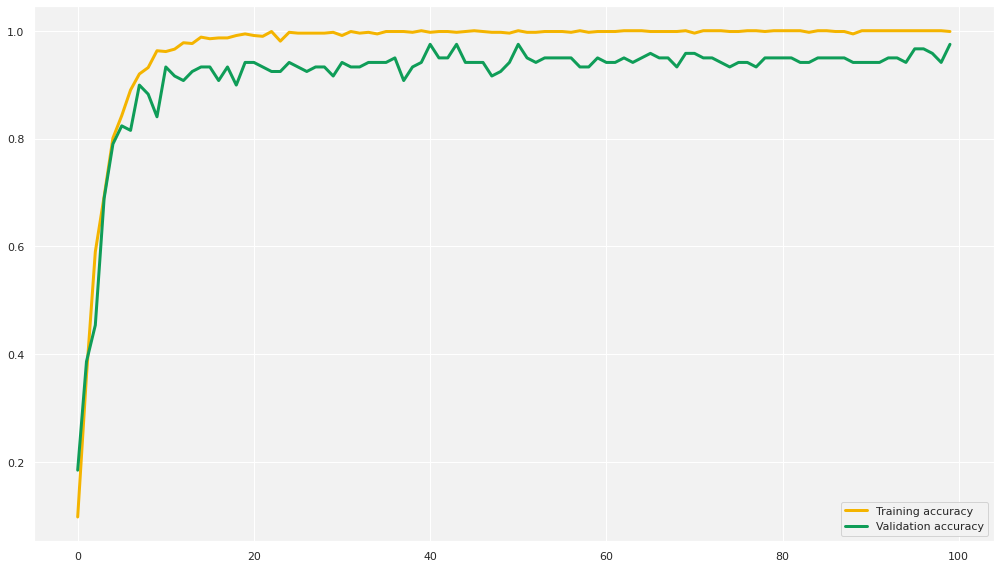

In [34]:
virc_(model_4,history_4)

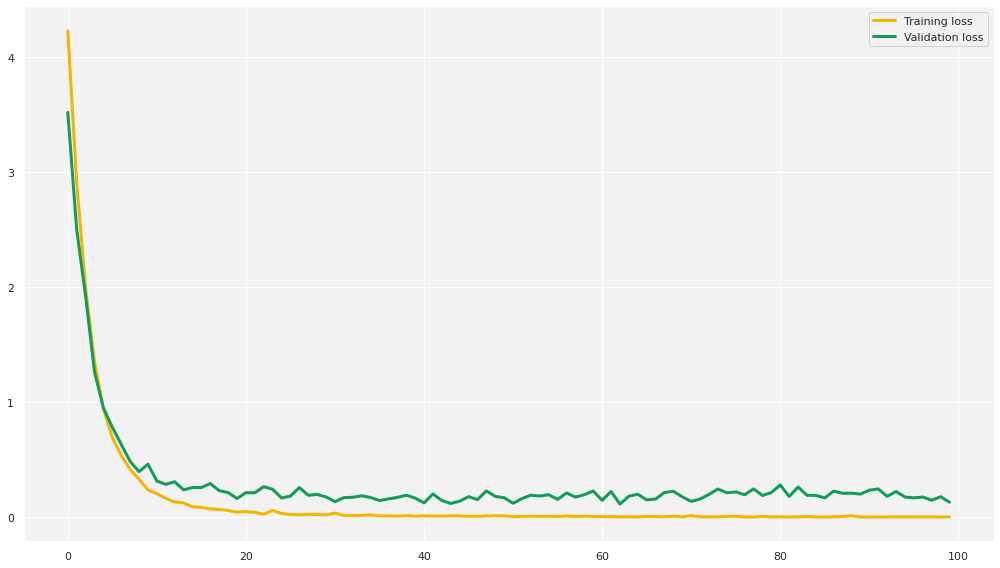

In [35]:
virc_loss(model_4,history_4)

#trial_5

In [36]:
#batch size 64
#rms_prop = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False, name="RMSprop")
# 
model_5,history_5 = base_line_model(rms_prop , 64)

model_5.summary()
model_5.evaluate(xTest, yTest)

Epoch 1/100
11/11 [==============================] - 1s 28ms/step - loss: 4.2953 - accuracy: 0.0906 - val_loss: 3.7002 - val_accuracy: 0.2269
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 3.1467 - accuracy: 0.3358 - val_loss: 2.7213 - val_accuracy: 0.3866
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 2.2308 - accuracy: 0.5305 - val_loss: 2.0771 - val_accuracy: 0.4874
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 1.5812 - accuracy: 0.7088 - val_loss: 1.4887 - val_accuracy: 0.6975
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 1.1600 - accuracy: 0.7727 - val_loss: 1.1727 - val_accuracy: 0.7227
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 0.8448 - accuracy: 0.8306 - val_loss: 0.9509 - val_accuracy: 0.8151
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 0.6800 - accuracy: 0.8707 - val_loss: 0.7599 - val_accuracy: 0.8067
Epoch 8/100


[0.21110455691814423, 0.9595959782600403]

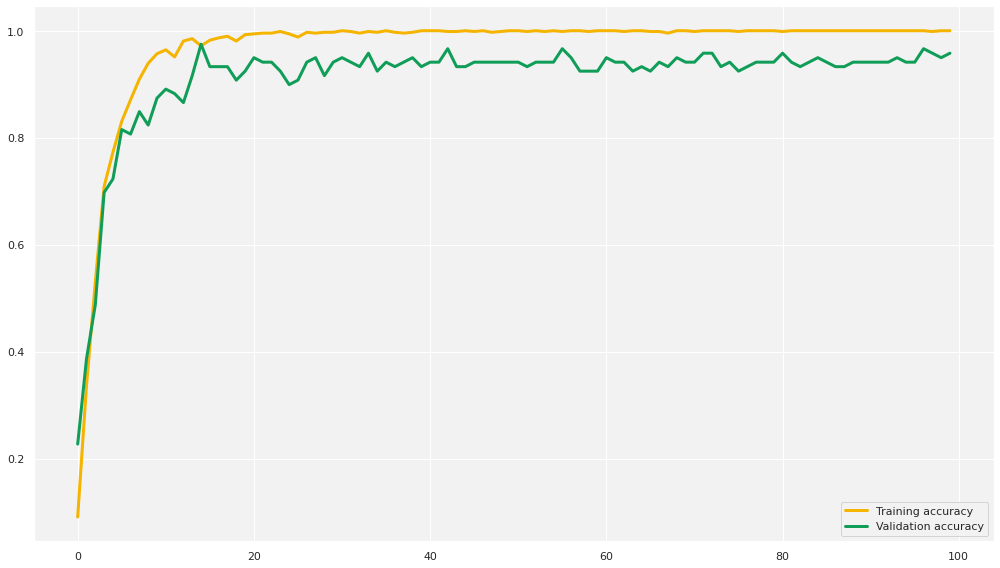

In [37]:
virc_(model_5,history_5)

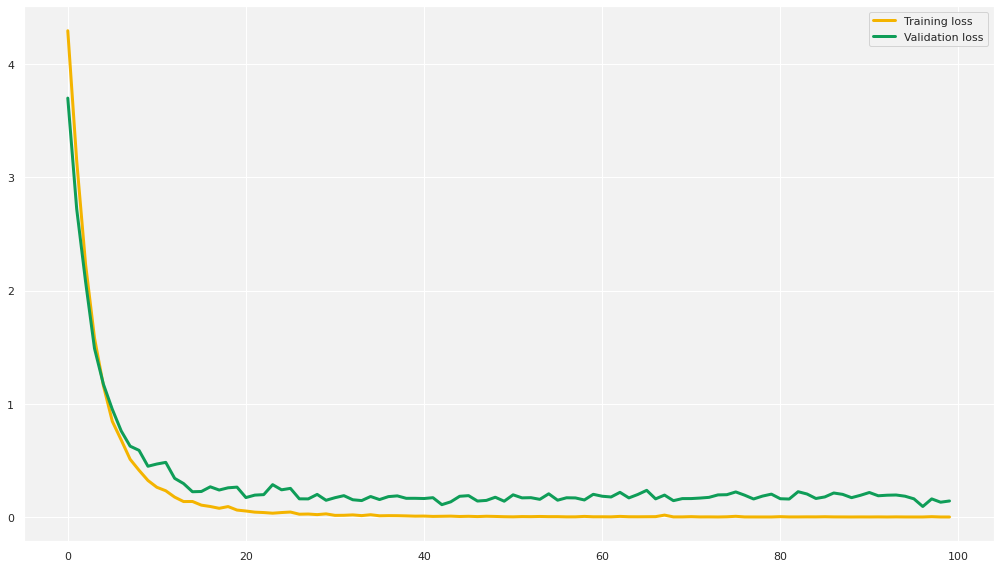

In [38]:
virc_loss(model_5,history_5)

#trial_6

In [39]:
#batch size 128
#rms_prop = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False, name="RMSprop")
# 
model_6,history_6 = base_line_model(rms_prop , 128)

model_6.summary()
model_6.evaluate(xTest, yTest)

Epoch 1/100
6/6 [==============================] - 1s 43ms/step - loss: 4.4141 - accuracy: 0.1010 - val_loss: 3.8968 - val_accuracy: 0.1933
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 3.4190 - accuracy: 0.3001 - val_loss: 3.0872 - val_accuracy: 0.3361
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 2.6044 - accuracy: 0.4383 - val_loss: 2.4877 - val_accuracy: 0.4118
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 2.0305 - accuracy: 0.5884 - val_loss: 1.9743 - val_accuracy: 0.5630
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 1.5876 - accuracy: 0.7117 - val_loss: 1.6125 - val_accuracy: 0.6050
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 1.2593 - accuracy: 0.7489 - val_loss: 1.3037 - val_accuracy: 0.6975
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 1.0052 - accuracy: 0.8410 - val_loss: 1.1846 - val_accuracy: 0.6975
Epoch 8/100
6/6 [===

[0.15452495217323303, 0.9595959782600403]

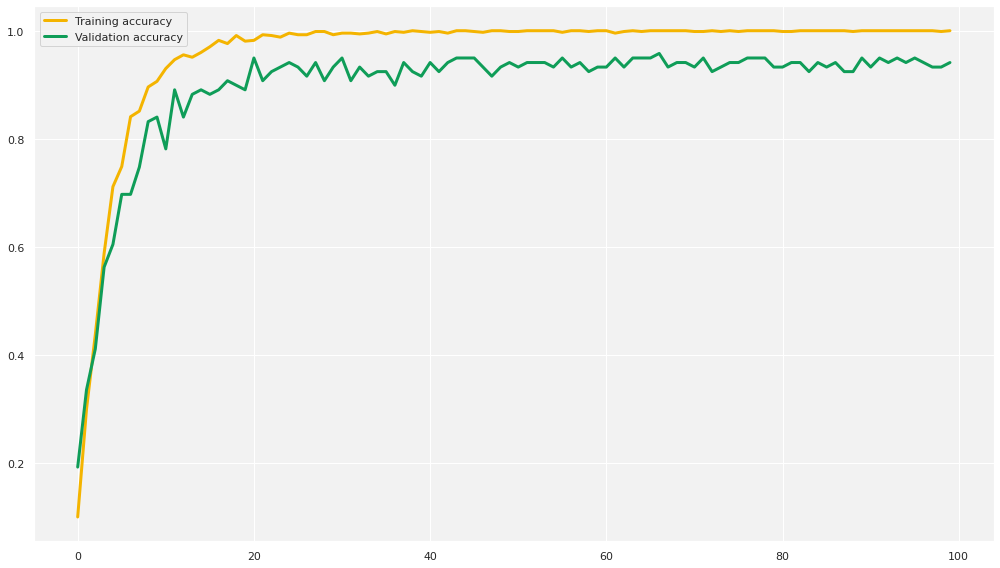

In [40]:
virc_(model_6,history_6)

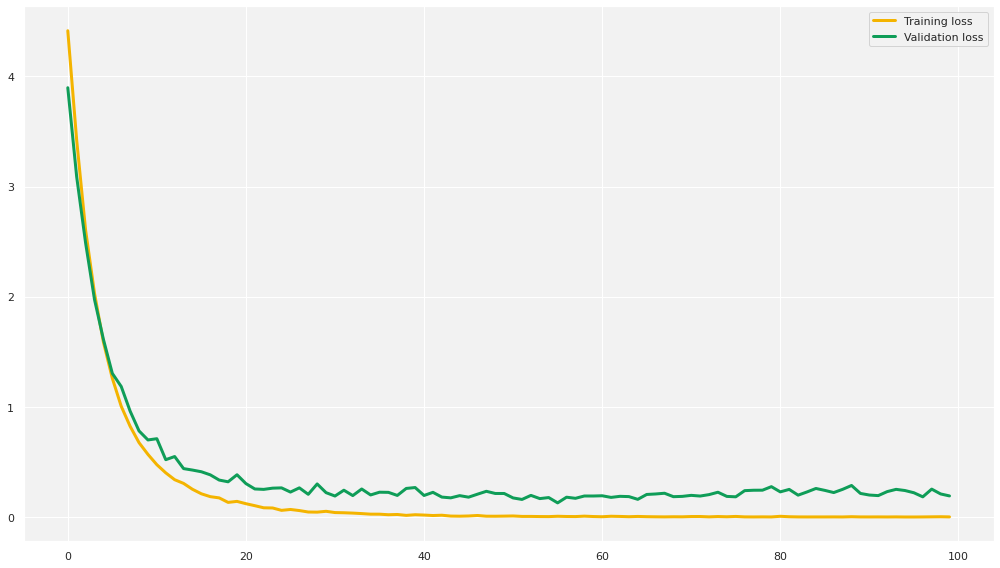

In [41]:
virc_loss(model_6,history_6)

#So from the previous trails we can see that the model with RMSprop optimizer and batch_size 64 is the best one 

**now we will try this model with different numbers of nodes**

#trial_7

In [42]:
model_7,history_7 = base_line_model(rms_prop , 64, 1024)

model_7.summary()
model_7.evaluate(xTest, yTest)

Epoch 1/100
11/11 [==============================] - 1s 28ms/step - loss: 4.2756 - accuracy: 0.0966 - val_loss: 3.3596 - val_accuracy: 0.1765
Epoch 2/100
11/11 [==============================] - 0s 16ms/step - loss: 2.7186 - accuracy: 0.3878 - val_loss: 2.2196 - val_accuracy: 0.4538
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 1.7585 - accuracy: 0.6196 - val_loss: 1.5634 - val_accuracy: 0.6050
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 1.1580 - accuracy: 0.7444 - val_loss: 1.0973 - val_accuracy: 0.7311
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 0.7785 - accuracy: 0.8366 - val_loss: 0.9252 - val_accuracy: 0.7143
Epoch 6/100
11/11 [==============================] - 0s 12ms/step - loss: 0.5540 - accuracy: 0.8900 - val_loss: 0.6638 - val_accuracy: 0.8151
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 0.4167 - accuracy: 0.9153 - val_loss: 0.6239 - val_accuracy: 0.7647
Epoch 

[0.22142904996871948, 0.9595959782600403]

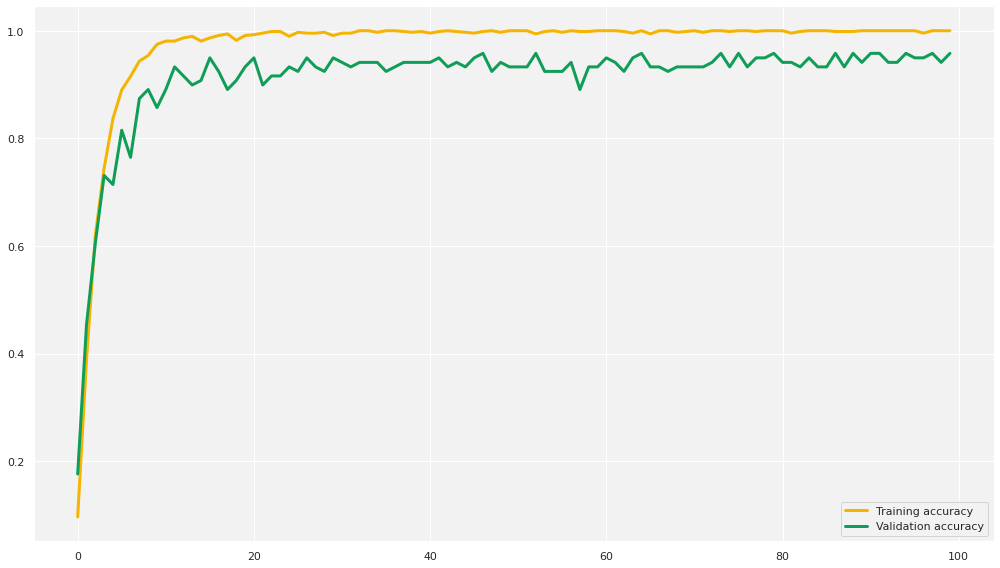

In [43]:
virc_(model_7,history_7)

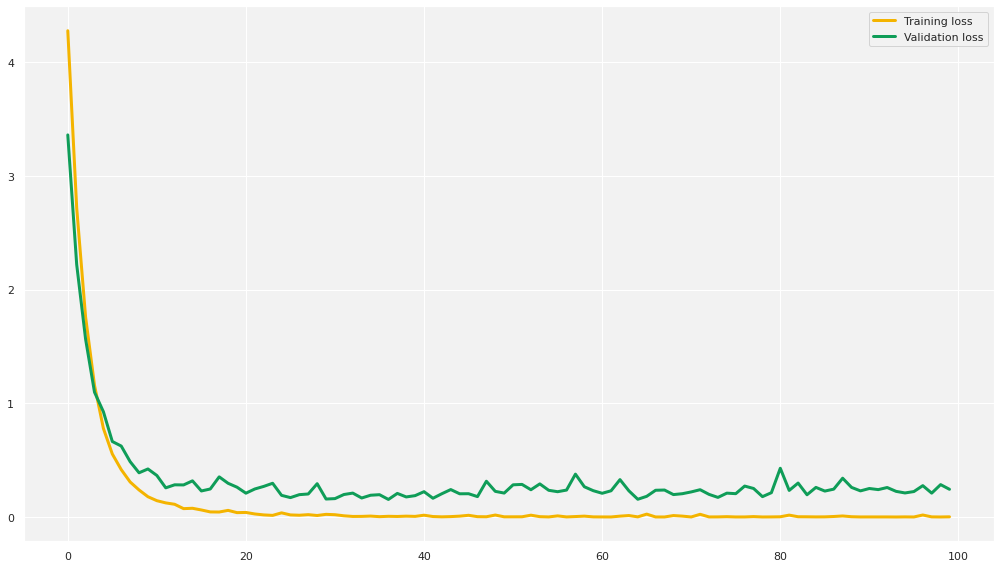

In [44]:
virc_loss(model_7,history_7)

#trial_8

In [45]:
model_8,history_8 = base_line_model(rms_prop , 64, 2048)

model_8.summary()
model_8.evaluate(xTest, yTest)

Epoch 1/100
11/11 [==============================] - 2s 73ms/step - loss: 4.3538 - accuracy: 0.0966 - val_loss: 3.0529 - val_accuracy: 0.1765
Epoch 2/100
11/11 [==============================] - 0s 28ms/step - loss: 2.3584 - accuracy: 0.4056 - val_loss: 1.9428 - val_accuracy: 0.4622
Epoch 3/100
11/11 [==============================] - 0s 28ms/step - loss: 1.3898 - accuracy: 0.6597 - val_loss: 1.1468 - val_accuracy: 0.7143
Epoch 4/100
11/11 [==============================] - 0s 33ms/step - loss: 0.8609 - accuracy: 0.7905 - val_loss: 0.9132 - val_accuracy: 0.7143
Epoch 5/100
11/11 [==============================] - 0s 27ms/step - loss: 0.5479 - accuracy: 0.8767 - val_loss: 0.7514 - val_accuracy: 0.7563
Epoch 6/100
11/11 [==============================] - 0s 29ms/step - loss: 0.4121 - accuracy: 0.9004 - val_loss: 0.6924 - val_accuracy: 0.7815
Epoch 7/100
11/11 [==============================] - 0s 35ms/step - loss: 0.2822 - accuracy: 0.9421 - val_loss: 0.5620 - val_accuracy: 0.8235
Epoch 

[0.4457196295261383, 0.9191918969154358]

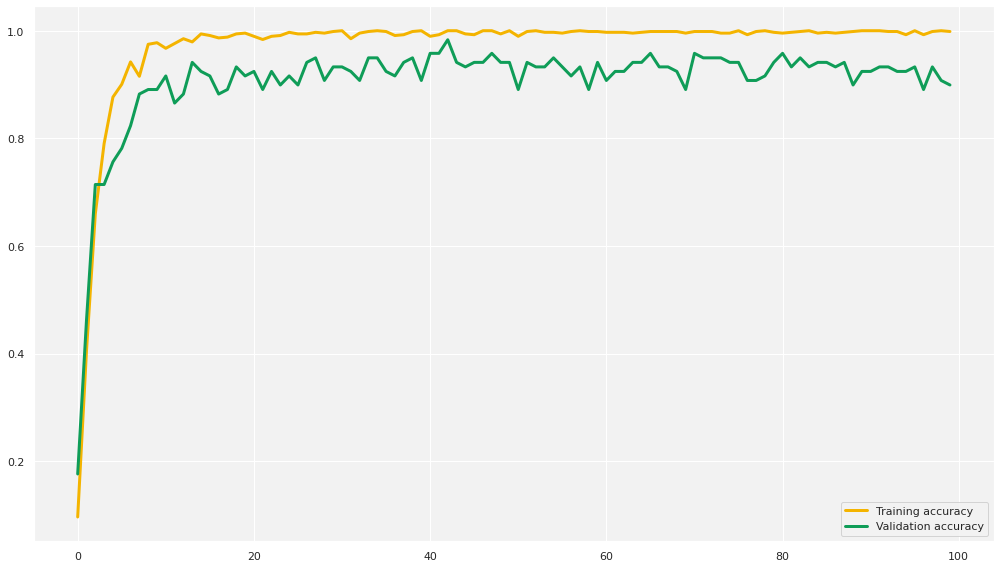

In [46]:
virc_(model_8,history_8)

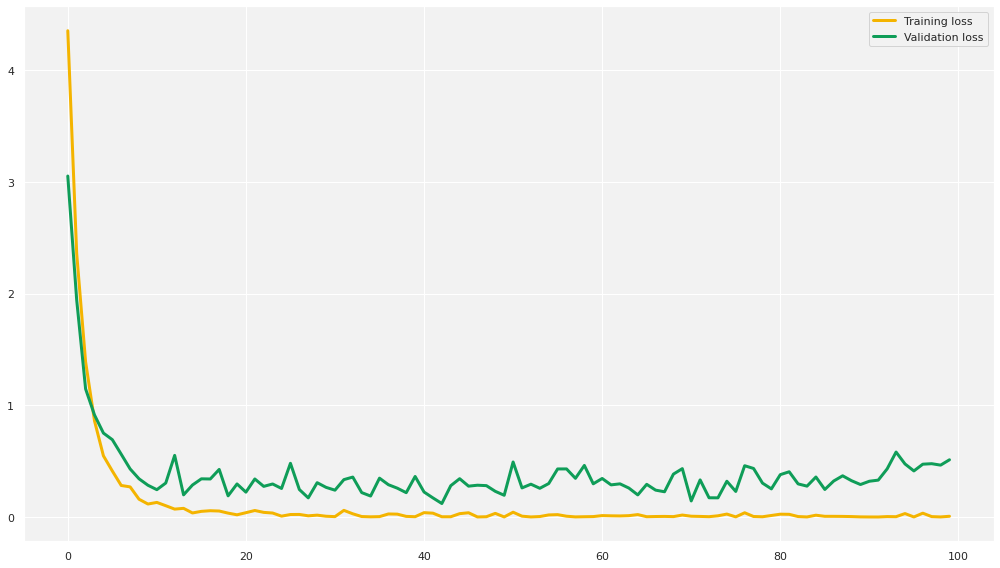

In [47]:
virc_loss(model_8,history_8)

#trial_9

In [48]:
model_9,history_9 = base_line_model(rms_prop , 64, 512)

model_9.summary()
model_9.evaluate(xTest, yTest)

Epoch 1/100
11/11 [==============================] - 2s 61ms/step - loss: 4.3063 - accuracy: 0.0847 - val_loss: 3.7057 - val_accuracy: 0.2017
Epoch 2/100
11/11 [==============================] - 0s 19ms/step - loss: 3.1502 - accuracy: 0.3239 - val_loss: 2.7330 - val_accuracy: 0.3529
Epoch 3/100
11/11 [==============================] - 0s 15ms/step - loss: 2.2389 - accuracy: 0.5201 - val_loss: 2.0124 - val_accuracy: 0.5546
Epoch 4/100
11/11 [==============================] - 0s 19ms/step - loss: 1.6285 - accuracy: 0.6716 - val_loss: 1.4943 - val_accuracy: 0.6807
Epoch 5/100
11/11 [==============================] - 0s 14ms/step - loss: 1.2006 - accuracy: 0.7489 - val_loss: 1.1911 - val_accuracy: 0.7143
Epoch 6/100
11/11 [==============================] - 0s 22ms/step - loss: 0.8954 - accuracy: 0.8128 - val_loss: 0.9559 - val_accuracy: 0.8151
Epoch 7/100
11/11 [==============================] - 0s 17ms/step - loss: 0.6565 - accuracy: 0.8930 - val_loss: 0.6970 - val_accuracy: 0.8655
Epoch 

[0.29310110211372375, 0.9494949579238892]

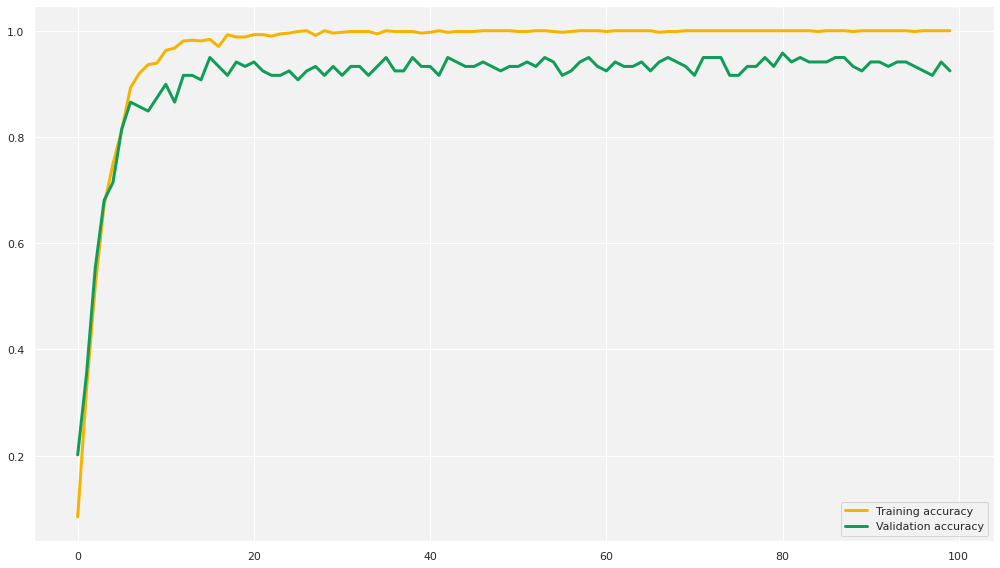

In [49]:
virc_(model_9,history_9)

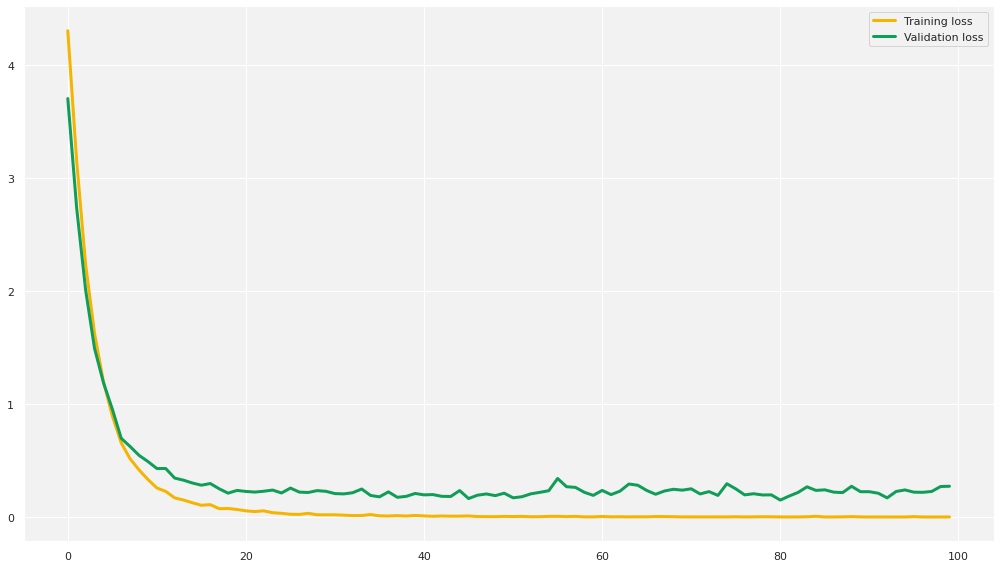

In [50]:
virc_loss(model_9,history_9)

#So from the previous trails we can see that the model with RMSprop optimizer and batch_size 64 and 1024 nodes is the best one 

**now we will try this model with different numbers of dropout rate**

#trial_10

In [51]:
model_10,history_10 = base_line_model(rms_prop , 64, 1024, 0.3)

model_10.summary()
model_10.evaluate(xTest, yTest)

Epoch 1/100
11/11 [==============================] - 1s 29ms/step - loss: 4.0555 - accuracy: 0.1352 - val_loss: 3.1390 - val_accuracy: 0.2101
Epoch 2/100
11/11 [==============================] - 0s 15ms/step - loss: 2.3491 - accuracy: 0.4324 - val_loss: 1.9575 - val_accuracy: 0.4538
Epoch 3/100
11/11 [==============================] - 0s 12ms/step - loss: 1.4088 - accuracy: 0.6790 - val_loss: 1.1963 - val_accuracy: 0.7059
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 0.8575 - accuracy: 0.8232 - val_loss: 0.9002 - val_accuracy: 0.7059
Epoch 5/100
11/11 [==============================] - 0s 13ms/step - loss: 0.5563 - accuracy: 0.8841 - val_loss: 0.6642 - val_accuracy: 0.8151
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 0.3795 - accuracy: 0.9183 - val_loss: 0.5317 - val_accuracy: 0.8403
Epoch 7/100
11/11 [==============================] - 0s 11ms/step - loss: 0.2768 - accuracy: 0.9450 - val_loss: 0.4317 - val_accuracy: 0.8908
Epoch 

[0.27700987458229065, 0.9545454382896423]

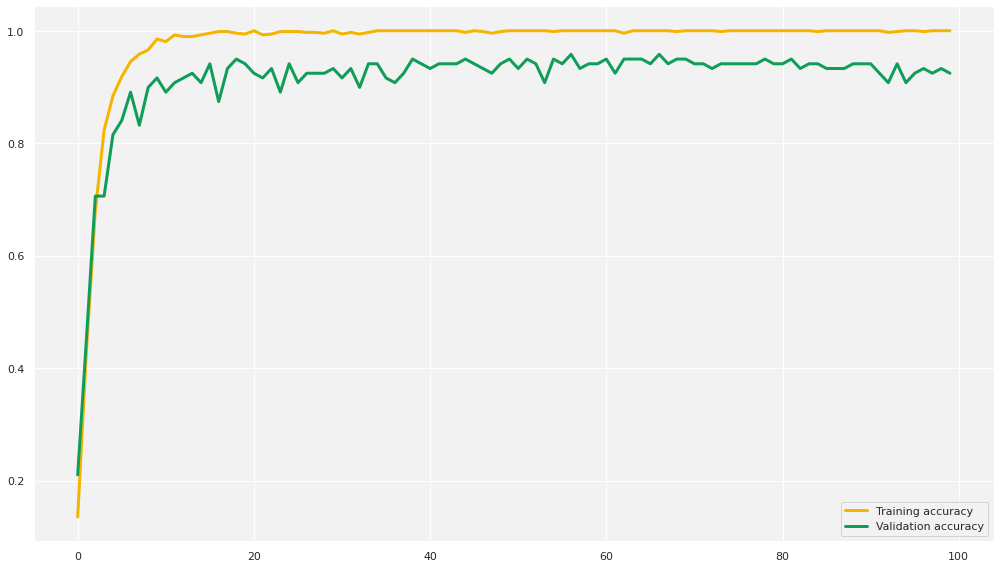

In [52]:
virc_(model_10,history_10)

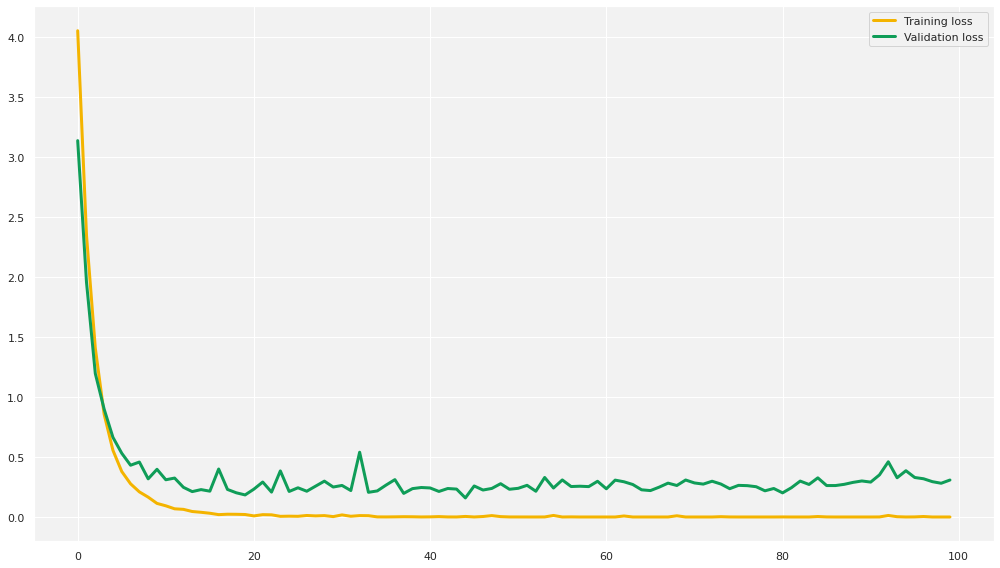

In [53]:
virc_loss(model_10,history_10)

#trial_11

In [60]:
model_11,history_11 = base_line_model(rms_prop , 64, 1024, 0.6)

model_11.summary()
model_11.evaluate(xTest, yTest)

Epoch 1/100
11/11 [==============================] - 1s 28ms/step - loss: 4.2590 - accuracy: 0.0981 - val_loss: 3.5093 - val_accuracy: 0.2941
Epoch 2/100
11/11 [==============================] - 0s 11ms/step - loss: 2.8386 - accuracy: 0.3848 - val_loss: 2.3670 - val_accuracy: 0.4958
Epoch 3/100
11/11 [==============================] - 0s 12ms/step - loss: 1.9307 - accuracy: 0.5691 - val_loss: 1.7135 - val_accuracy: 0.6471
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 1.3344 - accuracy: 0.7207 - val_loss: 1.2078 - val_accuracy: 0.7227
Epoch 5/100
11/11 [==============================] - 0s 11ms/step - loss: 0.9157 - accuracy: 0.8039 - val_loss: 0.9387 - val_accuracy: 0.7563
Epoch 6/100
11/11 [==============================] - 0s 13ms/step - loss: 0.7022 - accuracy: 0.8470 - val_loss: 0.7477 - val_accuracy: 0.8151
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 0.5297 - accuracy: 0.8841 - val_loss: 0.7746 - val_accuracy: 0.7227
Epoch 

[0.21305227279663086, 0.9494949579238892]

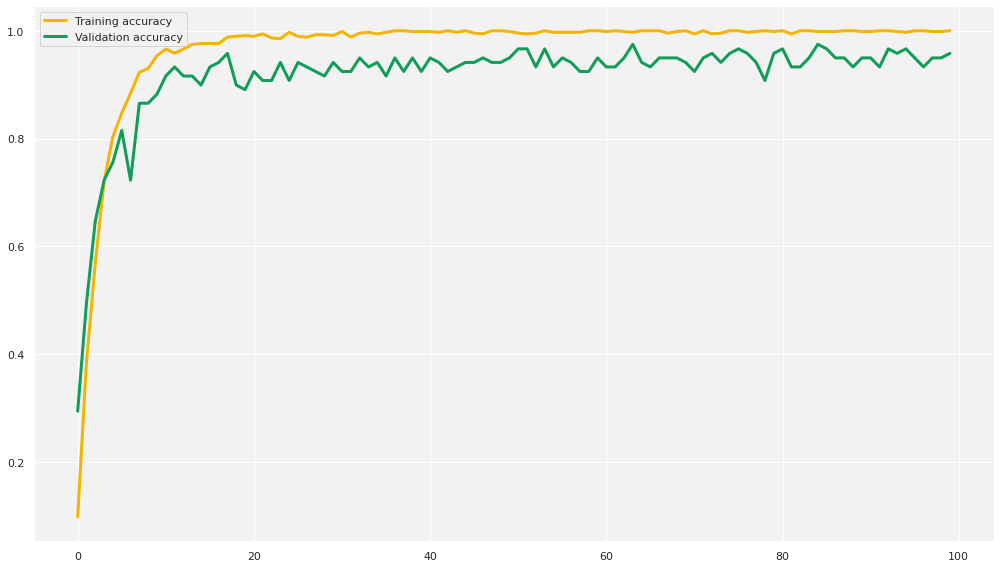

In [61]:
virc_(model_11,history_11)

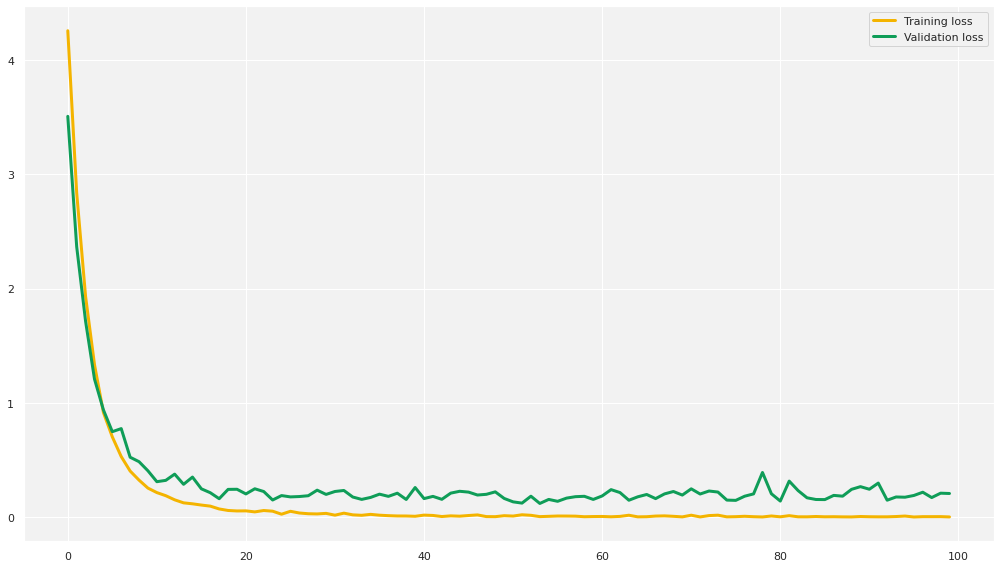

In [62]:
virc_loss(model_11,history_11)

#trial_12

In [57]:
model_12,history_12 = base_line_model(rms_prop , 64, 1024, 0.5)

model_12.summary()
model_12.evaluate(xTest, yTest)

Epoch 1/100
11/11 [==============================] - 1s 26ms/step - loss: 4.2006 - accuracy: 0.0951 - val_loss: 3.3682 - val_accuracy: 0.1849
Epoch 2/100
11/11 [==============================] - 0s 13ms/step - loss: 2.6553 - accuracy: 0.3893 - val_loss: 2.2593 - val_accuracy: 0.3950
Epoch 3/100
11/11 [==============================] - 0s 12ms/step - loss: 1.6699 - accuracy: 0.6137 - val_loss: 1.5306 - val_accuracy: 0.5798
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 1.0988 - accuracy: 0.7623 - val_loss: 1.1297 - val_accuracy: 0.6975
Epoch 5/100
11/11 [==============================] - 0s 11ms/step - loss: 0.7470 - accuracy: 0.8440 - val_loss: 0.8002 - val_accuracy: 0.7647
Epoch 6/100
11/11 [==============================] - 0s 12ms/step - loss: 0.5226 - accuracy: 0.9064 - val_loss: 0.6171 - val_accuracy: 0.8487
Epoch 7/100
11/11 [==============================] - 0s 11ms/step - loss: 0.4053 - accuracy: 0.9138 - val_loss: 0.4958 - val_accuracy: 0.8739
Epoch 

[0.1683165580034256, 0.9646464586257935]

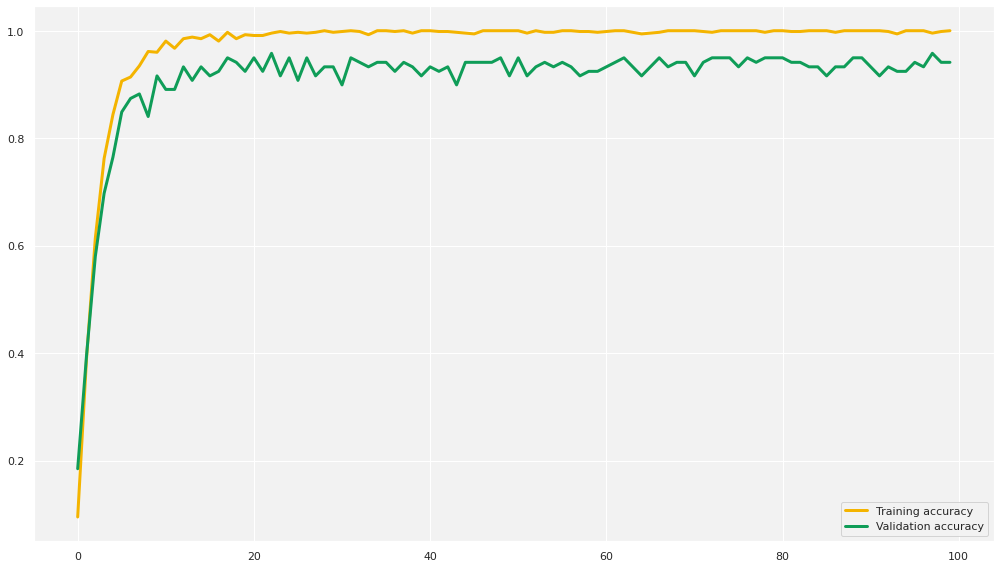

In [58]:
virc_(model_12,history_12)

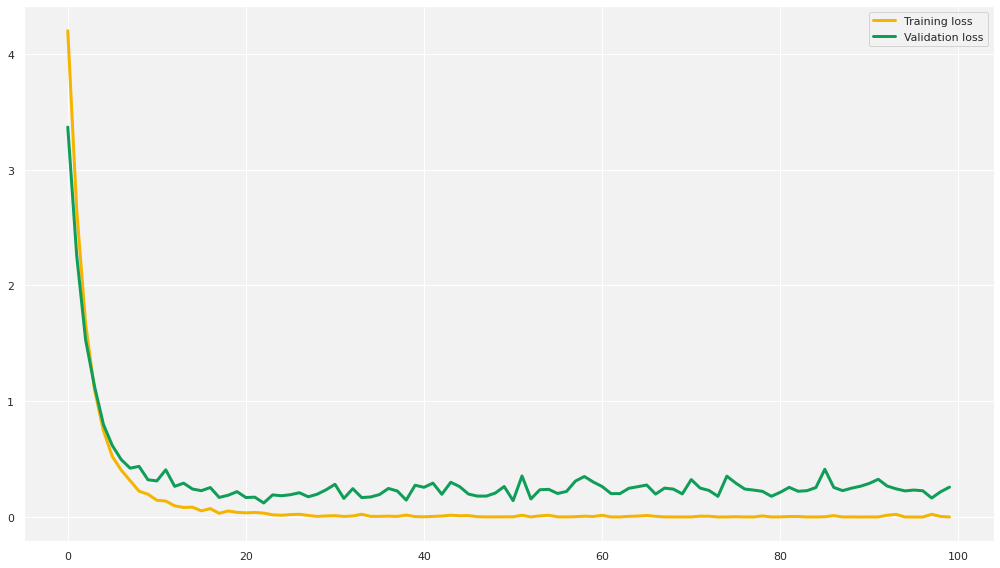

In [59]:
virc_loss(model_12,history_12)

#so the best model is model_12 = base_line_model(rms_prop , 64, 1024, 0.5) which has accuracy 96% on test set and 16% loss on test set also and has 100% accuracy on training data